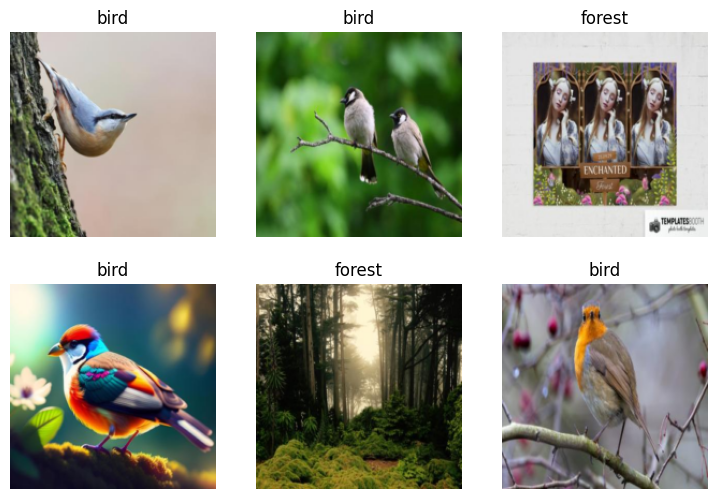

In [1]:
from fastcore.all import *
from fastai.vision.all import *
from fastprogress.fastprogress import force_console_behavior
from fastai.callback.progress import ProgressCallback
import fastai.callback.all
import fastprogress
import torch
import sys

# Force PyTorch to avoid MIOpen's problematic BatchNorm kernels
torch.backends.cudnn.enabled = False 

path = Path('bird_or_not')

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [2]:
# Create your learner normally
learn = vision_learner(dls, resnet18, metrics=error_rate)
# Remove the problematic callback
learn.remove_cb(ProgressCallback)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/ignacio/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 47.5MB/s]


[0, 1.216843605041504, 1.4263503551483154, 0.3142857253551483, '00:01']
[0, 0.3387288451194763, 0.4214099943637848, 0.22857142984867096, '00:01']
[1, 0.20790207386016846, 0.24078579246997833, 0.05714285746216774, '00:01']
[2, 0.15126237273216248, 0.25561225414276123, 0.08571428805589676, '00:01']


In [3]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000


In [4]:
is_bird,_,probs = learn.predict(PILImage.create('forest.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: forest.
Probability it's a bird: 0.0001
